# Plotting results

## Overflow

In [1]:
import context
import geopandas as gp
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

Loading the files: one with the river geometries, the other with the overflow results

In [3]:
river_geo = 'data_gloric/padma_gloric_1m3_final.shp'
result_data = 'data_results/overflow_130616_130617_2.pkl'
river = gp.read_file(river_geo).set_index('Reach_ID')
results = pd.read_pickle(result_data)

Creating a maximum flow by taking the max over the time axis.

In [4]:
max_overflow = pd.DataFrame(results.max(axis=1))\
        .rename({0:'max_overflow'},axis=1)\
        .join(river[['geometry']])
max_overflow = gp.GeoDataFrame(max_overflow).reset_index()
max_overflow.crs = {'init':'EPSG:4326'}
max_overflow.head()

,Reach_ID,max_overflow,geometry
0,40633088,74.218533,LINESTRING (79.09374999999974 31.3854166666661...
1,40633506,114.017808,LINESTRING (79.0812499999997 31.35624999999951...
2,40633927,129.560853,LINESTRING (79.07708333333304 31.3437499999995...
3,40634367,121.140140,LINESTRING (77.88958333333304 31.3270833333328...
4,40634489,111.109322,LINESTRING (78.00208333333305 31.3229166666661...


In [5]:
from custom_plot import *

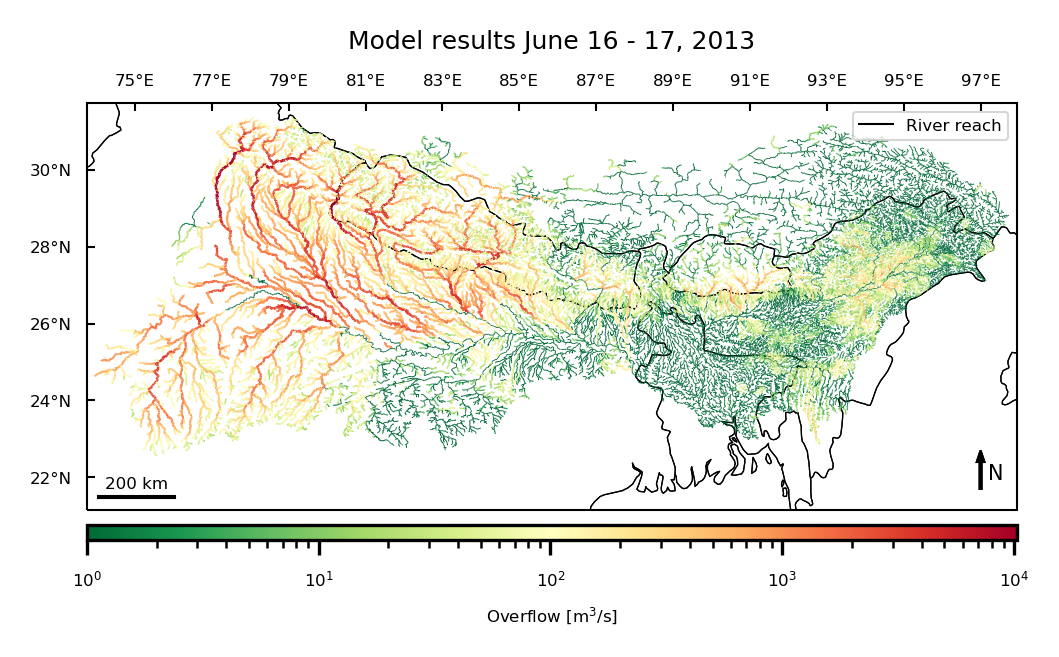

In [7]:
plot_results_map(max_overflow);

In [ ]:
#plot_results_map(max_overflow, figsize = (9.3,6.2) ,printoption = True, filename = '../../thesis/report/figs/result_basin_large_4.pdf');

## Overflow with rain

We are adding rainfall data agregated over the two days.

In [8]:
import helper_functions
import globals
bounds = globals.bounds(0.2)
west, south, east, north = bounds
south -= 1.2
north += 0.2
bounds = west, south, east, north
dates = globals.dates()
filenames = helper_functions.get_hdf_list(dates[2:4])
gpm_data = helper_functions.GPM(filenames[0],bounds)
newLats, newLons = gpm_data.coordinates(bounds)
total_rain = np.zeros(gpm_data.get_crop().shape)
for filename in filenames:
    gpm_data = helper_functions.GPM(filename,bounds)
    #gpm_data.save_cropped_tif()
    total_rain += gpm_data.get_crop()
total_rain = total_rain/2
rain_data = (total_rain, newLats, newLons)

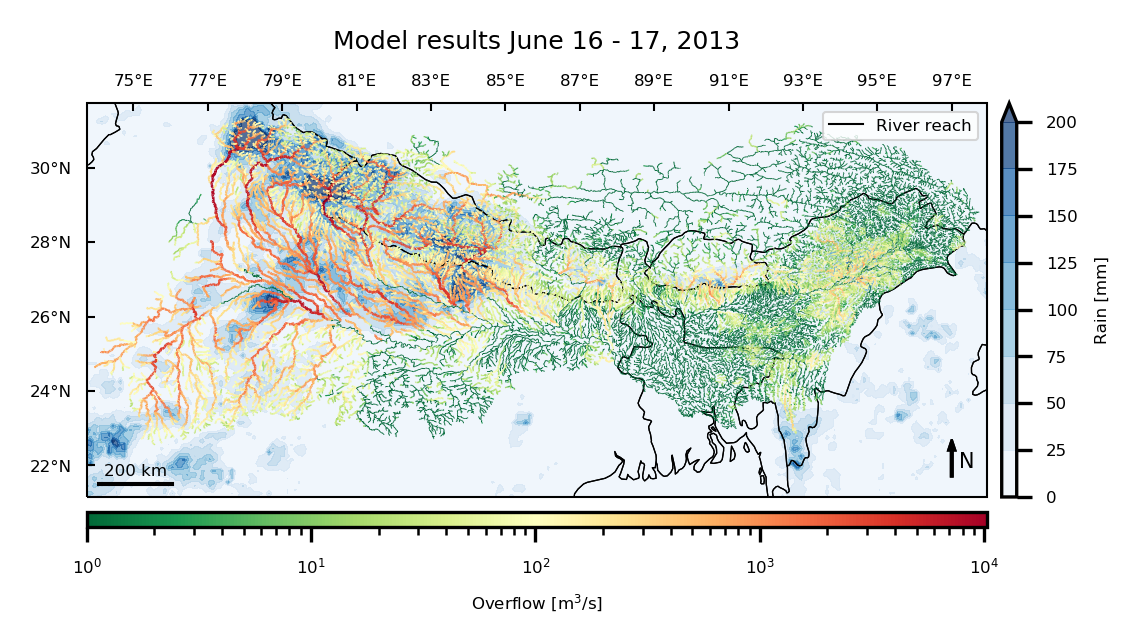

In [9]:
plot_results_map_rain(max_overflow,rain_data);

In [ ]:
#plot_results_map_rain(max_overflow, rain_data, figsize = (9.3,6.2) ,printoption = True, filename = '../../thesis/report/figs/result_rain_large_2.pdf');